This code uses data set from kaggle to predict the price of a given given the feaures like Street, Lot size and year built.
We are using Random Forest Regression for solving the problem, this is avaliable in scikit-learn.
Lets code.

# Data preprocessing  

In [3]:
import csv
import numpy
_input = []
_output = []

def fetch_input(filename):
    with open(filename,'r') as csvfile:
        data = csv.reader(csvfile)
        data.next()
        for row in data:
            _input.append(row[1:80])
            _output.append(row[80])
    return _input,_output

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

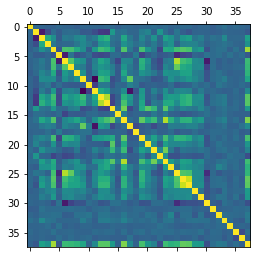

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('../Data/train.csv')
data.describe()
data['SalePrice'].describe()
plt.matshow(data.corr())
# sns.distplot(data['SalePrice'])
data.columns

In [9]:
var = 'GrLivArea'
plotdata = pd.concat([data['SalePrice'],data[var]],axis = 1)
plotdata.plot.scatter(x= 'SalePrice', y = data[var])

KeyError: '[1710 1262 1786 ... 2340 1078 1256] not in index'

In [11]:
X, y = fetch_input('../Data/train.csv')

In [13]:
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def ordinalEncode(data):
    enc = OrdinalEncoder()
    enc.fit(data)
    return enc.transform(data)
X = ordinalEncode(X)
print X

       0      3   16  17    18    19    33    35    36    37 ...  58  59  62  \
0      60   8450   7   5  2003  2003   706     0   150   856 ...   1   1   1   
1      20   9600   6   8  1976  1976   978     0   284  1262 ...   2   1   1   
2      60  11250   7   5  2001  2002   486     0   434   920 ...   3   1   1   
3      70   9550   7   5  1915  1970   216     0   540   756 ...   4   2   1   
4      60  14260   8   5  2000  2000   655     0   490  1145 ...   5   1   1   
5      50  14115   5   5  1993  1995   732     0    64   796 ...   6   2   1   
6      20  10084   8   5  2004  2005  1369     0   317  1686 ...   7   1   1   
7      60  10382   7   6  1973  1973   859    32   216  1107 ...   8   1   1   
8      50   6120   7   5  1931  1950     0     0   952   952 ...   9   2   2   
9     190   7420   5   6  1939  1950   851     0   140   991 ...  10   1   3   
10     20  11200   5   5  1965  1965   906     0   134  1040 ...  11   2   1   
11     60  11924   9   5  2005  2006   9

In [96]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 100)

regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
test_input = []
test_output = []

def fetch_test(filename):
    with open(filename,'r') as csvfile:
        data = csv.reader(csvfile)
        data.next()
        for row in data:
            test_input.append(row[1:80])
    return test_input

In [98]:
testX = fetch_test('test.csv')
testX = ordinalEncode(testX)

In [99]:
test_output = regr.predict(testX)

file = open('submit.csv','w')
file.write('Id,SalePrice\n')
count = 1461
print(test_output)
for each in numpy.nditer(test_output):
#     print(each)
    file.write(str(count))
    count += 1
    file.write(',')
    file.write(str(each))
    file.write('\n')
file.close()

[123130.   149874.86 146441.6  ... 148381.5  125897.26 206685.06]
